Import necessary libraries and load matches dataset

In [414]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

matches = pd.read_csv('Datasets/international_matches.csv')

Describe the dataset

In [415]:
# EDA
print(matches.describe())
print('----------------------------------------')

# Observing total number of rows and columns in the dataset
print(matches.head())
print(matches.tail())
print(matches.shape)  # (23921, 25)
print('----------------------------------------')

# Observing all the columns in the dataset
print(list(matches))
print('----------------------------------------')

       home_team_fifa_rank  away_team_fifa_rank  home_team_total_fifa_points  \
count         23921.000000         23921.000000                 23921.000000   
mean             77.854688            80.797375                   323.401488   
std              52.355225            53.232902                   500.825725   
min               1.000000             1.000000                     0.000000   
25%              33.000000            36.000000                     0.000000   
50%              71.000000            73.000000                     0.000000   
75%             115.000000           119.000000                   547.000000   
max             211.000000           211.000000                  2164.000000   

       away_team_total_fifa_points  home_team_score  away_team_score  \
count                 23921.000000     23921.000000     23921.000000   
mean                    315.453576         1.609214         1.068266   
std                     490.944273         1.630127         1.2

Give ids to team names

In [416]:
team_name = {}
index = 0
for idx, row in matches.iterrows():
    name = row['home_team']
    if name not in team_name.keys():
        team_name[name] = index
        index += 1

    name = row['away_team']
    if name not in team_name.keys():
        team_name[name] = index
        index += 1
team_name

{'Bolivia': 0,
 'Uruguay': 1,
 'Brazil': 2,
 'Mexico': 3,
 'Ecuador': 4,
 'Venezuela': 5,
 'Guinea': 6,
 'Sierra Leone': 7,
 'Paraguay': 8,
 'Argentina': 9,
 'Peru': 10,
 'Colombia': 11,
 'Zimbabwe': 12,
 'Eswatini': 13,
 'Faroe Islands': 14,
 'Norway': 15,
 'Sweden': 16,
 'Switzerland': 17,
 'Australia': 18,
 'Canada': 19,
 'Congo': 20,
 'France': 21,
 'Austria': 22,
 'Finland': 23,
 'Denmark': 24,
 'Lithuania': 25,
 'Iceland': 26,
 'USA': 27,
 'Estonia': 28,
 'Portugal': 29,
 'Albania': 30,
 'Bulgaria': 31,
 'England': 32,
 'Poland': 33,
 'Romania': 34,
 'Hungary': 35,
 'Russia': 36,
 'Luxembourg': 37,
 'Republic of Ireland': 38,
 'Northern Ireland': 39,
 'Latvia': 40,
 'Scotland': 41,
 'Spain': 42,
 'Chile': 43,
 'Morocco': 44,
 'Mali': 45,
 'Saudi Arabia': 46,
 'Thailand': 47,
 'Senegal': 48,
 'Italy': 49,
 'Cameroon': 50,
 'Israel': 51,
 'San Marino': 52,
 'Netherlands': 53,
 'Tunisia': 54,
 'Germany': 55,
 'Costa Rica': 56,
 'Korea Republic': 57,
 'Nigeria': 58,
 "Côte d'Ivoire":

Remove missing values

In [417]:
print(matches[matches["home_team"] == "Qatar"])

             date home_team             away_team home_team_continent  \
188    1994-01-25     Qatar               Finland                Asia   
192    1994-01-27     Qatar               Finland                Asia   
508    1994-09-10     Qatar                  Oman                Asia   
515    1994-09-16     Qatar                 Yemen                Asia   
577    1994-11-09     Qatar                  Oman                Asia   
...           ...       ...                   ...                 ...   
23338  2021-12-10     Qatar  United Arab Emirates                Asia   
23343  2021-12-15     Qatar               Algeria                Asia   
23344  2021-12-18     Qatar                 Egypt                Asia   
23550  2022-03-26     Qatar              Bulgaria                Asia   
23615  2022-03-29     Qatar              Slovenia                Asia   

      away_team_continent  home_team_fifa_rank  away_team_fifa_rank  \
188                Europe                   54      

In [418]:
# Finding Missing Values
print(matches.isnull().sum())
print('----------------------------------------')

# Drop all rows with missing values
matches = matches.dropna()
print(matches.shape)  # (4303, 25)

date                                 0
home_team                            0
away_team                            0
home_team_continent                  0
away_team_continent                  0
home_team_fifa_rank                  0
away_team_fifa_rank                  0
home_team_total_fifa_points          0
away_team_total_fifa_points          0
home_team_score                      0
away_team_score                      0
tournament                           0
city                                 0
country                              0
neutral_location                     0
shoot_out                            0
home_team_result                     0
home_team_goalkeeper_score       15542
away_team_goalkeeper_score       15826
home_team_mean_defense_score     16134
home_team_mean_offense_score     15411
home_team_mean_midfield_score    15759
away_team_mean_defense_score     16357
away_team_mean_offense_score     15609
away_team_mean_midfield_score    15942
dtype: int64
------------

In [419]:
print(matches[matches["home_team"] == "Qatar"])

Empty DataFrame
Columns: [date, home_team, away_team, home_team_continent, away_team_continent, home_team_fifa_rank, away_team_fifa_rank, home_team_total_fifa_points, away_team_total_fifa_points, home_team_score, away_team_score, tournament, city, country, neutral_location, shoot_out, home_team_result, home_team_goalkeeper_score, away_team_goalkeeper_score, home_team_mean_defense_score, home_team_mean_offense_score, home_team_mean_midfield_score, away_team_mean_defense_score, away_team_mean_offense_score, away_team_mean_midfield_score]
Index: []

[0 rows x 25 columns]


In [420]:
wins = matches[matches["home_team_result"] == "Win"].count()
loses = matches[matches["home_team_result"] == "Lose"].count()
draws = matches[matches["home_team_result"] == "Draw"].count()

print(wins, loses, draws)

date                             1950
home_team                        1950
away_team                        1950
home_team_continent              1950
away_team_continent              1950
home_team_fifa_rank              1950
away_team_fifa_rank              1950
home_team_total_fifa_points      1950
away_team_total_fifa_points      1950
home_team_score                  1950
away_team_score                  1950
tournament                       1950
city                             1950
country                          1950
neutral_location                 1950
shoot_out                        1950
home_team_result                 1950
home_team_goalkeeper_score       1950
away_team_goalkeeper_score       1950
home_team_mean_defense_score     1950
home_team_mean_offense_score     1950
home_team_mean_midfield_score    1950
away_team_mean_defense_score     1950
away_team_mean_offense_score     1950
away_team_mean_midfield_score    1950
dtype: int64 date                             1263

Find out how many matches each continent wins in contrast to their total matches played

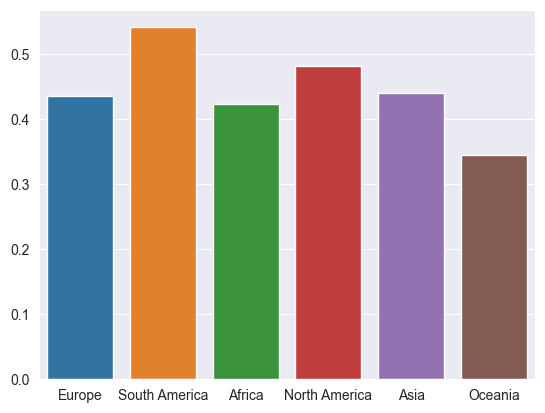

In [421]:
continent_rows = matches["home_team_continent"]
continent_match_count = continent_rows.value_counts()

# find how many games each continent won
continent_wins = matches[matches["home_team_result"] == "Win"]
continent_wins = continent_wins["home_team_continent"].value_counts()

# plot the number of wins for each continent divided by the number of games played
continent_wins = continent_wins / continent_match_count
sns.barplot(x=continent_wins.index, y=continent_wins.values)
plt.show()

Study which countries have the best offense, defense, midfield and goalkeeper scores

In [422]:
offense = matches.groupby("home_team")["home_team_mean_offense_score"].mean().sort_values(ascending=False)
midfield = matches.groupby("home_team")["home_team_mean_midfield_score"].mean().sort_values(ascending=False)
defense = matches.groupby("home_team")["home_team_mean_defense_score"].mean().sort_values(ascending=False)
goalkeeper = matches.groupby("home_team")["home_team_goalkeeper_score"].mean().sort_values(ascending=False)

# find the mean of all categories
overall = ((offense + midfield + defense + goalkeeper) / 4).sort_values(ascending=False)

# make a table with 5 rows and a column for each category
table = pd.DataFrame(index=range(1, 6), columns=["offense", "midfield", "defense", "goalkeeper", "overall"])

# fill the table with the mean values for each category
table["offense"] = offense.index[:5]
table["midfield"] = midfield.index[:5]
table["defense"] = defense.index[:5]
table["goalkeeper"] = goalkeeper.index[:5]
table["overall"] = overall.index[:5]

table

,offense,midfield,defense,goalkeeper,overall
1,Argentina,Spain,Brazil,Germany,Spain
2,Brazil,France,Spain,Spain,Germany
3,Spain,Germany,Italy,Italy,Brazil
4,France,Brazil,Germany,France,France
5,Netherlands,England,England,Brazil,Italy


Import sklearn libraries

In [423]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

from sklearn.model_selection import GridSearchCV


Give ids to tournament names

In [424]:
tournament_names = {}
index = 0
for idx, row in matches.iterrows():
    name = row['tournament']
    if name not in tournament_names.keys():
        tournament_names[name] = index
        index += 1

    name = row['tournament']
    if name not in tournament_names.keys():
        tournament_names[name] = index
        index += 1

tournament_names

{'Friendly': 0,
 'FIFA World Cup qualification': 1,
 "King's Cup": 2,
 'Confederations Cup': 3,
 'Gold Cup': 4,
 'EAFF Championship': 5,
 'African Cup of Nations': 6,
 'Lunar New Year Cup': 7,
 'Cyprus International Tournament': 8,
 'Kirin Cup': 9,
 'FIFA World Cup': 10,
 'UEFA Euro qualification': 11,
 'Copa América': 12,
 'UEFA Euro': 13,
 'African Cup of Nations qualification': 14,
 'AFC Asian Cup': 15,
 'Nations Cup': 16,
 'Copa Confraternidad': 17,
 'Superclásico de las Américas': 18,
 'Copa del Pacífico': 19,
 'Nehru Cup': 20,
 'Kirin Challenge Cup': 21,
 'African Nations Championship': 22,
 'OSN Cup': 23,
 'Intercontinental Cup': 24,
 'UEFA Nations League': 25,
 'African Nations Championship qualification': 26,
 'CONCACAF Nations League': 27,
 'COSAFA Cup': 28,
 'Arab Cup': 29,
 'CONMEBOL–UEFA Cup of Champions': 30}

Add Winner column

In [425]:
# Winner of particular match
# For Home team win value is 1, Away team win value is 2 and for Draw value is 0
matches['Winner'] = '-'

def match_winner(df):
    if int(df['home_team_score']) == int(df['away_team_score']):
        df['Winner'] = 0
    elif int(df['home_team_score']) > int(df['away_team_score']):
        df['Winner'] = 1
    else:
        df['Winner'] = 2

    return df

matches = matches.apply(match_winner, axis = 1)

Drop irrelevant columns

In [426]:
matches = matches.drop(columns = ['home_team_total_fifa_points', 'away_team_total_fifa_points', 'home_team_continent', 'away_team_continent', 'country', 'city', 'shoot_out', 'home_team_result', 'home_team_score', 'away_team_score'])

Replace strings with ids

In [427]:
# Replace Team names by corresponding id:
def replace_name(df):
    df['home_team'] = team_name[df['home_team']]
    df['away_team'] = team_name[df['away_team']]

    return df

matches = matches.apply(replace_name, axis = 1)

In [428]:
# Replace Tournament names by corresponding id:
def replace_tournament_name(df):
    df['tournament'] = tournament_names[df['tournament']]

    return df

matches = matches.apply(replace_tournament_name, axis = 1)

In [429]:
# replace date with epoch
matches['date'] = pd.to_datetime(matches['date'])
matches['date'] = matches['date'].astype(np.int64) // 10 ** 9


Prepare data for training and testing

In [430]:
X = matches.iloc[:, :-1].values
y = matches.iloc[:, -1].values

_X = X.copy()
_X[:, 1] = X[:, 2]
_X[:, 2] = X[:, 1]
_X[:, 3] = X[:, 4]
_X[:, 4] = X[:, 3]
_X[:, 7] = X[:, 8]
_X[:, 8] = X[:, 7]
_X[:, 9] = X[:, 12]
_X[:, 12] = X[:, 9]
_X[:, 10] = X[:, 13]
_X[:, 13] = X[:, 10]
_X[:, 11] = X[:, 14]
_X[:, 14] = X[:, 11]

_y = y.copy()

for i in range(len(_y)):
  if _y[i]==1:
    _y[i] = 2
  elif _y[i] == 2:
    _y[i] = 1

X = np.concatenate((X,_X), axis= 0)

y = np.concatenate((y,_y))


print(matches.iloc[:, :-1].columns)


X = np.array(X, dtype = 'f')
y = np.array(y, dtype = 'f')


from sklearn.preprocessing import LabelEncoder
LabelEncoder_res=LabelEncoder()
y=LabelEncoder_res.fit_transform(y)

X, y = shuffle(X,y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Scaling of Data:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.fit_transform(X_test)

print('Draws: ', len(y[y==0]))
print('Wins: ', len(y[y==1]))
print('Loses:', len(y[y==2]))

# make a table with 5 rows and a column for each category
table = pd.DataFrame(index=range(len(X_train)), columns=matches.iloc[:, :-1].columns, data=X_train)
table


Index(['date', 'home_team', 'away_team', 'home_team_fifa_rank',
       'away_team_fifa_rank', 'tournament', 'neutral_location',
       'home_team_goalkeeper_score', 'away_team_goalkeeper_score',
       'home_team_mean_defense_score', 'home_team_mean_offense_score',
       'home_team_mean_midfield_score', 'away_team_mean_defense_score',
       'away_team_mean_offense_score', 'away_team_mean_midfield_score'],
      dtype='object')
Draws:  2312
Wins:  3147
Loses: 3147


,date,home_team,away_team,home_team_fifa_rank,away_team_fifa_rank,tournament,neutral_location,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
0,1.221005e+09,112.0,39.0,8.0,32.0,1.0,0.0,88.0,72.0,79.199997,78.000000,79.199997,71.800003,70.699997,71.000000
1,1.121558e+09,3.0,11.0,6.0,25.0,4.0,1.0,78.0,80.0,76.000000,71.699997,76.199997,80.800003,78.699997,70.199997
2,1.458950e+09,35.0,110.0,19.0,18.0,0.0,0.0,73.0,81.0,68.500000,72.300003,75.199997,78.800003,78.300003,81.500000
3,1.141171e+09,48.0,15.0,29.0,39.0,0.0,0.0,75.0,79.0,76.500000,79.000000,76.199997,80.000000,83.699997,78.500000
4,1.522109e+09,79.0,67.0,44.0,45.0,0.0,1.0,73.0,82.0,71.500000,74.300003,74.800003,81.800003,75.300003,76.800003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6449,1.521763e+09,17.0,67.0,8.0,45.0,0.0,0.0,84.0,82.0,79.000000,75.000000,79.800003,81.800003,75.300003,76.800003
6450,1.643674e+09,4.0,10.0,46.0,22.0,1.0,0.0,71.0,74.0,73.500000,76.000000,74.500000,74.500000,73.000000,76.800003
6451,1.352851e+09,46.0,9.0,112.0,3.0,0.0,0.0,69.0,80.0,67.800003,72.699997,72.800003,81.800003,89.000000,84.000000
6452,1.479168e+09,59.0,21.0,31.0,7.0,0.0,0.0,70.0,88.0,80.199997,81.000000,79.199997,83.800003,87.000000,85.199997


Import keras libraries

## Method 1: Logistic Regression

In [431]:
np.random.seed(69)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
LR = LogisticRegression(random_state = 69, max_iter=1000)
LR.fit(X_train, y_train)
score_train_acc = LR.score(X_train, y_train)
score_test_acc = LR.score(X_test, y_test)
print(score_train_acc) # 53
print(score_test_acc) # 54
y_pred_LR = LR.predict(X_test)
print(classification_report(y_test, y_pred_LR))
print(confusion_matrix(y_test, y_pred_LR, labels=range(3)))

0.3701580415246359
0.35223048327137546
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       612
           1       0.00      0.00      0.00       782
           2       0.35      1.00      0.52       758

    accuracy                           0.35      2152
   macro avg       0.12      0.33      0.17      2152
weighted avg       0.12      0.35      0.18      2152

[[  0   0 612]
 [  0   0 782]
 [  0   0 758]]


Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


## Method 2: SGDC Classifier

In [432]:
from sklearn.linear_model import SGDClassifier
SGD = SGDClassifier(loss = 'log_loss', penalty = 'elasticnet')
SGD.fit(X_train, y_train)
score_train_acc = SGD.score(X_train, y_train)
score_test_acc = SGD.score(X_test, y_test)
print(score_train_acc) # 50
print(score_test_acc)  # 50
y_pred_SGD = SGD.predict(X_test)
print(classification_report(y_test, y_pred_SGD))
print(confusion_matrix(y_test, y_pred_SGD, labels=range(3)))

0.36643941741555625
0.36338289962825276
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       612
           1       0.36      1.00      0.53       782
           2       0.00      0.00      0.00       758

    accuracy                           0.36      2152
   macro avg       0.12      0.33      0.18      2152
weighted avg       0.13      0.36      0.19      2152

[[  0 612   0]
 [  0 782   0]
 [  0 758   0]]


Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


## Method 3: SVM

In [433]:
from sklearn.svm import SVC
svm_model = SVC()
parameters = {'C' : [ 0.1, 0.001, 1]}
svm_model = GridSearchCV(svm_model, param_grid= parameters ,cv=5)
svm_model.fit(X_train, y_train)
score_train_acc = svm_model.score(X_train, y_train)
score_test_acc = svm_model.score(X_test, y_test)
print(score_train_acc) # 57
print(score_test_acc)  # 53
y_pred_SVM = svm_model.predict(X_test)
print(classification_report(y_test, y_pred_SVM))
print(confusion_matrix(y_test, y_pred_SVM, labels=range(3)))

0.3701580415246359
0.35223048327137546
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       612
           1       0.00      0.00      0.00       782
           2       0.35      1.00      0.52       758

    accuracy                           0.35      2152
   macro avg       0.12      0.33      0.17      2152
weighted avg       0.12      0.35      0.18      2152

[[  0   0 612]
 [  0   0 782]
 [  0   0 758]]


Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


## Method 4: Decision Tree

In [434]:
from sklearn.tree import DecisionTreeClassifier
dc = DecisionTreeClassifier()
dc.fit(X_train, y_train)
score_train_acc = dc.score(X_train, y_train)
score_test_acc = dc.score(X_test, y_test)
print(score_train_acc) # 100
print(score_test_acc)  # 42
y_pred_dc = dc.predict(X_test)
print(classification_report(y_test, y_pred_dc))
print(confusion_matrix(y_test, y_pred_dc, labels=range(3)))

1.0
0.3898698884758364
              precision    recall  f1-score   support

           0       0.29      0.27      0.28       612
           1       0.44      0.44      0.44       782
           2       0.42      0.43      0.42       758

    accuracy                           0.39      2152
   macro avg       0.38      0.38      0.38      2152
weighted avg       0.39      0.39      0.39      2152

[[167 223 222]
 [199 345 238]
 [213 218 327]]


## Method 5: KNN

In [435]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, weights = 'uniform', algorithm='auto')
knn.fit(X_train, y_train)
score_train_acc = knn.score(X_train, y_train)
score_test_acc = knn.score(X_test, y_test)
print(score_train_acc) # 63
print(score_test_acc)  # 44
y_pred_knn = knn.predict(X_test)
print(classification_report(y_test, y_pred_knn))
print(confusion_matrix(y_test, y_pred_knn, labels=range(3)))

0.5735977688255346
0.3243494423791822
              precision    recall  f1-score   support

           0       0.36      0.47      0.41       612
           1       0.31      0.34      0.32       782
           2       0.30      0.19      0.23       758

    accuracy                           0.32      2152
   macro avg       0.32      0.33      0.32      2152
weighted avg       0.32      0.32      0.31      2152

[[287 230  95]
 [269 267 246]
 [248 366 144]]


## Method 6: Naive Bayes

In [436]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
score_train_acc = nb.score(X_train, y_train)
score_test_acc = nb.score(X_test, y_test)
print(score_train_acc) # 52
print(score_test_acc)  # 51
y_pred_nb = nb.predict(X_test)
print(classification_report(y_test, y_pred_nb))
print(confusion_matrix(y_test, y_pred_nb, labels=range(3)))

0.3720173535791757
0.3466542750929368
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       612
           1       0.35      0.35      0.35       782
           2       0.35      0.62      0.44       758

    accuracy                           0.35      2152
   macro avg       0.23      0.32      0.26      2152
weighted avg       0.25      0.35      0.28      2152

[[  0 228 384]
 [  0 275 507]
 [  0 287 471]]


Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


## Method 7: Random Forest

In [437]:
from sklearn.ensemble import RandomForestClassifier
rc = RandomForestClassifier(n_estimators=100)
rc.fit(X_train, y_train)
score_train_acc = rc.score(X_train, y_train)
score_test_acc = rc.score(X_test, y_test)
print(score_train_acc) # 100
print(score_test_acc)  # 52
y_pred_rc = rc.predict(X_test)
print(classification_report(y_test, y_pred_rc))
print(confusion_matrix(y_test, y_pred_rc, labels=range(3)))

1.0
0.48234200743494426
              precision    recall  f1-score   support

           0       0.32      0.16      0.21       612
           1       0.53      0.61      0.57       782
           2       0.49      0.61      0.54       758

    accuracy                           0.48      2152
   macro avg       0.45      0.46      0.44      2152
weighted avg       0.46      0.48      0.46      2152

[[ 98 236 278]
 [ 94 478 210]
 [116 180 462]]


## Method 8: Bagging Classifier

In [438]:
from sklearn.ensemble import BaggingClassifier
bc = BaggingClassifier(n_estimators=100)
bc.fit(X_train, y_train)
score_train_acc = bc.score(X_train, y_train)
score_test_acc = bc.score(X_test, y_test)
print(score_train_acc) # 100
print(score_test_acc)  # 50
y_pred_bc = bc.predict(X_test)
print(classification_report(y_test, y_pred_bc))
print(confusion_matrix(y_test, y_pred_bc, labels=range(3)))

1.0
0.4809479553903346
              precision    recall  f1-score   support

           0       0.34      0.19      0.24       612
           1       0.52      0.60      0.56       782
           2       0.49      0.59      0.54       758

    accuracy                           0.48      2152
   macro avg       0.45      0.46      0.45      2152
weighted avg       0.46      0.48      0.46      2152

[[114 243 255]
 [106 470 206]
 [119 188 451]]


## Method 9: Gradient Boosting

In [439]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1)
gbc.fit(X_train, y_train)
score_train_acc = gbc.score(X_train, y_train)
score_test_acc = gbc.score(X_test, y_test)
print(score_train_acc) # 63
print(score_test_acc)  # 53
y_pred_gbc = gbc.predict(X_test)
print(classification_report(y_test, y_pred_gbc))
print(confusion_matrix(y_test, y_pred_gbc, labels=range(3)))

0.5728230554694763
0.5181226765799256
              precision    recall  f1-score   support

           0       0.41      0.07      0.12       612
           1       0.54      0.69      0.61       782
           2       0.51      0.70      0.59       758

    accuracy                           0.52      2152
   macro avg       0.49      0.49      0.44      2152
weighted avg       0.49      0.52      0.46      2152

[[ 42 265 305]
 [ 26 540 216]
 [ 34 191 533]]


## Method 10: XGBoost

In [440]:
import xgboost as xgb
XGB = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0.4, learning_rate=0.01,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=1,
       n_estimators=40, n_jobs=1, nthread=None, objective='multi:softprob',
       random_state=0, reg_alpha=1e-05, reg_lambda=1,
       seed=2, subsample=0.8)
XGB.fit(X_train, y_train)
score_train_acc = XGB.score(X_train, y_train)
score_test_acc = XGB.score(X_test, y_test)
print(score_train_acc) # 55
print(score_test_acc)  # 51
y_pred_XGB = XGB.predict(X_test)
print(classification_report(y_test, y_pred_XGB))
print(confusion_matrix(y_test, y_pred_XGB, labels=range(3)))

0.5277347381468857
0.5023234200743495
              precision    recall  f1-score   support

           0       0.23      0.00      0.01       612
           1       0.52      0.69      0.59       782
           2       0.49      0.71      0.58       758

    accuracy                           0.50      2152
   macro avg       0.41      0.47      0.39      2152
weighted avg       0.43      0.50      0.42      2152

[[  3 283 326]
 [  3 537 242]
 [  7 210 541]]


In [441]:
import time

def prediction(team1, team2):
  id_home = team_name[team1['name']]
  id_away = team_name[team2['name']]

  date = time.time()
  tournament = tournament_names.get('FIFA World Cup')
  neutral_location =  1 if team1['name'] != 'Qatar' else 0

  t = np.array([date, id_home, id_away, team1['rank'], team2['rank'],
               tournament, neutral_location,
               team1['goalkeeper'], team2['goalkeeper'],
               team1['defence'], team1['offense'],
               team1['midfield'], team2['defence'],
               team2['offense'], team2['midfield']]).astype('float64')
  t = np.reshape(t, (1,-1))
  y_rc = XGB.predict(t)
  odds = XGB.predict_proba(t)[0]
  print(odds)
  if abs(odds[1] - odds[2]) < 0.01:
      return 'Draw'
  result = team1['name']
  if y_rc == 0:
    result = 'Draw'
  elif y_rc == 2:
    result = team2['name']
  return result

prediction({
    'name': "Qatar",
    'rank': 50,
    'goalkeeper': 68,
    'defence': 68,
    'midfield': 70,
    'offense': 71,
}, {
    'name': "Argentina",
    'rank': 3,
    'goalkeeper': 84,
    'defence': 81,
    'midfield': 82,
    'offense': 86,
})

[0.3069436 0.2874405 0.4056159]


'Argentina'

## Predict World Champion
### Groups

In [442]:
# Group A
qatar = {
    'name': "Qatar",
    'rank': 50,
    'goalkeeper': 68,
    'defence': 68,
    'midfield': 70,
    'offense': 71,
}
ecuador = {
    'name': "Ecuador",
    'rank': 44,
    'goalkeeper': 74,
    'defence': 75,
    'midfield': 72,
    'offense': 74,
}
senegal = {
    'name': "Senegal",
    'rank': 18,
    'goalkeeper': 69,
    'defence': 76,
    'midfield': 77,
    'offense': 77,
}
netherlands = {
    'name': "Netherlands",
    'rank': 8,
    'goalkeeper': 79,
    'defence': 83,
    'midfield': 81,
    'offense': 82,
}

# Group B
england = {
    'name': "England",
    'rank': 5,
    'goalkeeper': 82,
    'defence': 83,
    'midfield': 83,
    'offense': 85,
}
iran = {
    'name': "IR Iran",
    'rank': 20,
    'goalkeeper': 75,
    'defence': 71,
    'midfield': 71,
    'offense': 76,
}
usa = {
    'name': "USA",
    'rank': 16,
    'goalkeeper': 77,
    'defence': 74,
    'midfield': 76,
    'offense': 74,
}
wales = {
    'name': "Wales",
    'rank': 19,
    'goalkeeper': 75,
    'defence': 73,
    'midfield': 74,
    'offense': 74,
}

# Group C
argentina = {
    'name': "Argentina",
    'rank': 3,
    'goalkeeper': 84,
    'defence': 81,
    'midfield': 82,
    'offense': 86,
}
saudi_arabia = {
    'name': "Saudi Arabia",
    'rank': 51,
    'goalkeeper': 70,
    'defence': 73,
    'midfield': 72,
    'offense': 73,
}
mexico = {
    'name': "Mexico",
    'rank': 13,
    'goalkeeper': 80,
    'defence': 76,
    'midfield': 77,
    'offense': 79,
}
poland = {
    'name': "Poland",
    'rank': 26,
    'goalkeeper': 86,
    'defence': 75,
    'midfield': 76,
    'offense': 81,
}

# Group D
france = {
    'name': "France",
    'rank': 4,
    'goalkeeper': 87,
    'defence': 83,
    'midfield':85 ,
    'offense': 88,
}
australia = {
    'name': "Australia",
    'rank': 38,
    'goalkeeper': 78,
    'defence': 70,
    'midfield': 72,
    'offense': 72,
}
denmark = {
    'name': "Denmark",
    'rank': 10,
    'goalkeeper': 83,
    'defence': 78,
    'midfield': 82,
    'offense': 77,
}
tunisia = {
    'name': "Tunisia",
    'rank': 30,
    'goalkeeper': 68,
    'defence': 71,
    'midfield': 71,
    'offense': 75,
}

# Group E
spain = {
    'name': "Spain",
    'rank': 7,
    'goalkeeper': 83,
    'defence': 83,
    'midfield': 84,
    'offense': 82,
}
costaRica = {
    'name': "Costa Rica",
    'rank': 31,
    'goalkeeper': 86,
    'defence': 73,
    'midfield': 73,
    'offense': 69,
}
germany = {
    'name': "Germany",
    'rank': 11,
    'goalkeeper': 90,
    'defence': 82,
    'midfield': 85,
    'offense': 82,
}
japan = {
    'name': "Japan",
    'rank': 24,
    'goalkeeper': 72,
    'defence': 74,
    'midfield': 77,
    'offense': 76,
}

# Group F
belgium = {
    'name': "Belgium",
    'rank': 2,
    'goalkeeper': 90,
    'defence': 80,
    'midfield': 80,
    'offense': 86,
}
canada = {
    'name': "Canada",
    'rank': 41,
    'goalkeeper': 77,
    'defence': 70,
    'midfield': 73,
    'offense': 75,
}
morocco = {
    'name': "Morocco",
    'rank': 2,
    'goalkeeper': 84,
    'defence': 78,
    'midfield': 74,
    'offense': 74,
}
croatia = {
    'name': "Croatia",
    'rank': 12,
    'goalkeeper': 80,
    'defence': 78,
    'midfield': 83,
    'offense': 80,
}

# Group G
brazil = {
    'name': "Brazil",
    'rank': 1,
    'goalkeeper': 82,
    'defence': 80,
    'midfield': 80,
    'offense': 81,
}
serbia = {
    'name': "Serbia",
    'rank': 21,
    'goalkeeper': 74,
    'defence': 76,
    'midfield': 79,
    'offense': 75,
}
switzerland = {
    'name': "Switzerland",
    'rank': 15,
    'goalkeeper': 84,
    'defence': 75,
    'midfield': 78,
    'offense': 75,
}
cameroon = {
    'name': "Cameroon",
    'rank': 43,
    'goalkeeper': 67,
    'defence': 70,
    'midfield': 71,
    'offense': 72,
}

# Group H
portugal = {
    'name': "Portugal",
    'rank': 9,
    'goalkeeper': 82,
    'defence': 84,
    'midfield': 84,
    'offense': 84,
}
ghana = {
    'name': "Ghana",
    'rank': 61,
    'goalkeeper': 70,
    'defence': 73,
    'midfield': 76,
    'offense': 73,
}
uruguay = {
    'name': "Uruguay",
    'rank': 14,
    'goalkeeper': 80,
    'defence': 78,
    'midfield': 79,
    'offense': 79,
}
korea = {
    'name': "Korea Republic",
    'rank': 28,
    'goalkeeper': 69,
    'defence': 70,
    'midfield': 74,
    'offense': 74,
}



### Group Stage

In [443]:
prediction(qatar, ecuador)
# Draw ❌ (Ecuador)

[0.31937984 0.3381828  0.34243733]


'Draw'

In [444]:
prediction(england, iran)
# England ✔

[0.31032905 0.4142289  0.2754421 ]


'England'

In [445]:
prediction(senegal, netherlands)
# Netherlands ✔

[0.31646672 0.29421735 0.38931593]


'Netherlands'

In [446]:
prediction(usa, wales)
# Draw ✔

[0.318978   0.34424564 0.33677638]


'Draw'

In [447]:
prediction(argentina, saudi_arabia)
# Argentina ❌ (Saudi Arabia)

[0.3125815  0.38984787 0.29757065]


'Argentina'

In [448]:
prediction(denmark, tunisia)
# Denmark ❌ (Draw)

[0.31528494 0.3747042  0.31001082]


'Denmark'

In [449]:
prediction(mexico, poland)
# Poland ❌ (Draw)

[0.31508893 0.33881953 0.34609157]


'Draw'

In [450]:
prediction(france, australia)
# France ✔

[0.3056913  0.4187303  0.27557847]


'France'

In [451]:
prediction(morocco, croatia)
# Croatia ❌ (Draw)

[0.3211892  0.29830265 0.3805082 ]


'Croatia'

In [452]:
prediction(germany, japan)
# Germany ❌ (Japan)

[0.30931118 0.41515094 0.2755379 ]


'Germany'

In [453]:
prediction(spain, costaRica)
# Spain ✔

[0.3111837  0.41453412 0.27428222]


'Spain'

In [454]:
prediction(belgium, canada)
# Belgium ✔

[0.3104166  0.3839971  0.30558625]


'Belgium'

In [455]:
prediction(switzerland, cameroon)
# Switzerland ✔

[0.31381765 0.37168065 0.31450167]


'Switzerland'

In [456]:
prediction(uruguay, korea)
# Uruguay ❌ (Draw)

[0.3109169  0.37929425 0.30978882]


'Uruguay'

In [457]:
prediction(portugal, ghana)
# Portugal ✔

[0.30750975 0.4193929  0.27309734]


'Portugal'

In [458]:
prediction(brazil, serbia)
# Brazil ✔

[0.3140071  0.36837736 0.31761557]


'Brazil'

In [459]:
prediction(wales, iran)
# Draw ❌ (Iran)

[0.3219089 0.3481208 0.3299703]


'Wales'

In [460]:
prediction(qatar, senegal)
# Senegal ✔

[0.31431064 0.3136361  0.37205327]


'Senegal'

In [461]:
prediction(netherlands, ecuador)
# Netherlands ❌ (Draw)

[0.30973753 0.38955942 0.30070305]


'Netherlands'

In [462]:
prediction(england, usa)
# England ❌ (Draw)

[0.30841875 0.41410485 0.27747634]


'England'

In [463]:
prediction(tunisia, australia)
# Draw ❌ (Australia)

[0.3197181  0.34543872 0.3348432 ]


'Tunisia'

In [464]:
prediction(poland, saudi_arabia)
# Poland ✔

[0.31911525 0.36115178 0.31973296]


'Poland'

In [465]:
prediction(france, denmark)
# France ✔

[0.31518778 0.39799047 0.28682175]


'France'

In [466]:
prediction(argentina, mexico)
# Argentina ✔

[0.32053924 0.36976224 0.30969852]


'Argentina'

In [467]:
prediction(japan, costaRica)
# Japan ❌ (Costa Rica)

[0.31636795 0.36842114 0.31521088]


'Japan'

In [468]:
prediction(belgium, morocco)
# Belgium ❌ (Morocco)

[0.31860316 0.36669827 0.31469858]


'Belgium'

In [469]:
prediction(croatia, canada)
# Croatia ✔

[0.31114736 0.4063848  0.28246778]


'Croatia'

In [470]:
prediction(spain, germany)
# Germany ❌ (Draw)

[0.31247383 0.339149   0.34837714]


'Draw'

In [471]:
prediction(cameroon, serbia)
# Serbia ❌ (Draw)

[0.31367576 0.31502256 0.3713017 ]


'Serbia'

In [472]:
prediction(korea, ghana)
# Draw ❌ (Ghana)

[0.32148728 0.33895716 0.33955556]


'Draw'

In [473]:
prediction(brazil, switzerland)
# Brazil ✔

[0.3114934 0.372835  0.3156716]


'Brazil'

In [474]:
prediction(portugal, uruguay)
# Portugal ✔

[0.31572908 0.4015706  0.28270036]


'Portugal'

In [475]:
prediction(ecuador, senegal)
# Senegal ✔

[0.3133265  0.31494737 0.37172613]


'Senegal'

In [476]:
prediction(netherlands, qatar)
# Netherlands ✔

[0.31021127 0.3925093  0.29727942]


'Netherlands'

In [477]:
prediction(iran, usa)
# USA ✔

[0.31794643 0.33901742 0.34303612]


'Draw'

In [478]:
prediction(wales, england)
# England ✔

[0.3111819  0.27995208 0.408866  ]


'England'

In [479]:
prediction(tunisia, france)
# France ❌ (Tunisia)

[0.30558622 0.280888   0.41352582]


'France'

In [480]:
prediction(australia, denmark)
# Denmark ❌ (Australia)

[0.31085557 0.30878794 0.3803565 ]


'Denmark'

In [481]:
prediction(poland, argentina)
# Argentina ✔

[0.31033385 0.3118669  0.37779927]


'Argentina'

In [482]:
prediction(saudi_arabia, mexico)
# Mexico ✔

[0.3132187  0.31082734 0.37595394]


'Mexico'

In [483]:
prediction(croatia, belgium)
# Croatia ❌ (Draw)

[0.30645373 0.34193382 0.35161245]


'Draw'

In [484]:
prediction(canada, morocco)
# Morocco ✔

[0.3202497  0.33181366 0.34793663]


'Morocco'

In [485]:
prediction(japan, spain)
# Spain ❌ (Japan)

[0.3135776  0.28048685 0.40593556]


'Spain'

In [486]:
prediction(costaRica, germany)
# Germany ✔

[0.31104332 0.27953458 0.40942213]


'Germany'

In [487]:
prediction(korea, portugal)
# Portugal ❌ (Korea)

[0.3095947  0.279027   0.41137832]


'Portugal'

In [488]:
prediction(ghana, uruguay)
# Uruguay ✔

[0.3159972  0.31205663 0.3719462 ]


'Uruguay'

In [489]:
prediction(serbia, switzerland)
# Serbia ❌ (Switzerland)

[0.3126407  0.3457649  0.34159437]


'Draw'

In [490]:
prediction(cameroon, brazil)
# Brazil ❌ (Cameroon)

[0.3110501  0.3000582  0.38889167]


'Brazil'

### Group Results
#### Group A
1. Netherlands ✔
2. Senegal ✔
3. Ecuador ✔
4. Qatar ✔

#### Group B
1. England ✔
2. USA ✔
3. Wales ❌
4. Iran ❌

#### Group C
1. Argentina ✔
2. Poland ✔
3. Mexico ✔
4. Saudi Arabia ✔

#### Group D
1. France ✔
2. Denmark ❌
3. Australia ❌
4. Tunisia  ❌

#### Group E
1. Germany ❌
2. Spain ❌
3. Japan ❌
4. Costa Rica ✔

#### Group F
1. Croatia ❌
2. Belgium ❌
3. Morocco ❌
4. Canada ✔

#### Group G
1. Brazil ✔
2. Serbia ❌
3. Switzerland ❌
4. Cameroon ❌

#### Group H
1. Portugal ✔
2. Uruguay ❌
3. Ghana ❌
4. Korea ❌

### Knockout Stage
#### Round of 16
| Round of 16 | Quarter-finals | Semi-finals | Final | Semi-finals | Quarter-finals | Round of 16 |
|-------------|----------------|-------------|:-----:|------------:|---------------:|------------:|
| Netherlands |                |             |       |             |                |     England |
| USA         |                |             |       |             |                |     Senegal |
|             |                |             |       |             |                |             |
| Argentina   |                |             |       |             |                |      France |
| Denmark     |                |             |       |             |                |      Poland |
|             |                |             |       |             |                |             |
| Germany     |                |             |       |             |                |     Croatia |
| Belgium     |                |             |       |             |                |       Spain |
|             |                |             |       |             |                |             |
| Brazil      |                |             |       |             |                |    Portugal |
| Uruguay     |                |             |       |             |                |      Serbia |



In [491]:
prediction(netherlands, usa)
# Netherlands

[0.30909306 0.3887336  0.30217335]


'Netherlands'

In [492]:
prediction(argentina, denmark)
# Argentina

[0.3207542  0.36703476 0.312211  ]


'Argentina'

In [493]:
prediction(germany, belgium)
# Germany

[0.30339217 0.36349368 0.33311412]


'Germany'

In [494]:
prediction(brazil, uruguay)
# Brazil

[0.31745365 0.36066005 0.3218863 ]


'Brazil'

In [495]:
prediction(england, senegal)
# England

[0.31513155 0.40503207 0.27983645]


'England'

In [496]:
prediction(france, poland)
# France

[0.3162281  0.39476895 0.28900293]


'France'

In [497]:
prediction(croatia, spain)
# Spain

[0.31248304 0.3149586  0.37255833]


'Spain'

In [498]:
prediction(portugal, serbia)
# Portugal

[0.31232333 0.4098228  0.27785388]


'Portugal'

#### Quarter-finals
| Round of 16 | Quarter-finals | Semi-finals | Final | Semi-finals | Quarter-finals | Round of 16 |
|-------------|----------------|-------------|:-----:|------------:|---------------:|------------:|
| Netherlands |                |             |       |             |                |     England |
| USA         | Netherlands    |             |       |             |        England |     Senegal |
|             |                |             |       |             |                |             |
| Argentina   | Argentina      |             |       |             |         France |      France |
| Denmark     |                |             |       |             |                |      Poland |
|             |                |             |       |             |                |             |
| Germany     |                |             |       |             |                |     Croatia |
| Belgium     | Germany        |             |       |             |          Spain |       Spain |
|             |                |             |       |             |                |             |
| Brazil      | Brazil         |             |       |             |       Portugal |    Portugal |
| Uruguay     |                |             |       |             |                |      Serbia |

In [499]:
prediction(netherlands, argentina)
# Argentina (ANULO MUFA)

[0.30871916 0.32921237 0.3620685 ]


'Argentina'

In [500]:
prediction(germany, brazil)
# Germany

[0.31090316 0.37998444 0.3091124 ]


'Germany'

In [501]:
prediction(england, france)
# France

[0.30142486 0.34560007 0.35297513]


'Draw'

In [502]:
prediction(spain, portugal)
# Portugal

[0.3180992  0.32721612 0.35468465]


'Portugal'

#### Semi-finals
| Round of 16 | Quarter-finals | Semi-finals | Final | Semi-finals | Quarter-finals | Round of 16 |
|-------------|----------------|-------------|:-----:|------------:|---------------:|------------:|
| Netherlands |                |             |       |             |                |     England |
| USA         | Netherlands    |             |       |             |        England |     Senegal |
|             |                |             |       |             |                |             |
| Argentina   | Argentina      |             |       |             |         France |      France |
| Denmark     |                | Argentina   |       |      France |                |      Poland |
|             |                |             |       |             |                |             |
| Germany     |                | Germany     |       |    Portugal |                |     Croatia |
| Belgium     | Germany        |             |       |             |          Spain |       Spain |
|             |                |             |       |             |                |             |
| Brazil      | Brazil         |             |       |             |       Portugal |    Portugal |
| Uruguay     |                |             |       |             |                |      Serbia |

In [503]:
prediction(argentina, germany)
# Germany

[0.32087862 0.33222267 0.34689867]


'Germany'

In [504]:
prediction(france, portugal)
# Portugal

[0.32000884 0.35222378 0.3277674 ]


'France'

#### Final
| Round of 16 | Quarter-finals | Semi-finals |         Final         |  Semi-finals |  Quarter-finals |  Round of 16 |
|-------------|----------------|-------------|:---------------------:|-------------:|----------------:|-------------:|
| Netherlands |                |             |                       |              |                 |      England |
| USA         | Netherlands    |             |                       |              |         England |      Senegal |
|             |                |             |                       |              |                 |              |
| Argentina   | Argentina      |             |                       |              |          France |       France |
| Denmark     |                | Argentina   |                       |       France |                 |       Poland |
|             |                |             |  Germany vs Portugal  |              |                 |              |
| Germany     |                | Germany     |                       |     Portugal |                 |      Croatia |
| Belgium     | Germany        |             |                       |              |           Spain |        Spain |
|             |                |             |                       |              |                 |              |
| Brazil      | Brazil         |             |                       |              |        Portugal |     Portugal |
| Uruguay     |                |             |                       |              |                 |       Serbia |

In [505]:
prediction(germany, portugal)

[0.31627014 0.33022356 0.35350633]


'Portugal'

#### Winner
| Round of 16 | Quarter-finals | Semi-finals |        Final         |  Semi-finals |  Quarter-finals |  Round of 16 |
|-------------|----------------|-------------|:--------------------:|-------------:|----------------:|-------------:|
| Netherlands |                |             |                      |              |                 |      England |
| USA         | Netherlands    |             |                      |              |         England |      Senegal |
|             |                |             |                      |              |                 |              |
| Argentina   | Argentina      |             |                      |              |          France |       France |
| Denmark     |                | Argentina   |                      |       France |                 |       Poland |
|             |                |             | Germany vs Portugal  |              |                 |              |
| Germany     |                | Germany     |                      |     Portugal |                 |      Croatia |
| Belgium     | Germany        |             |                      |              |           Spain |        Spain |
|             |                |             |                      |              |                 |              |
| Brazil      | Brazil         |             |        WINNER        |              |        Portugal |     Portugal |
| Uruguay     |                |             |       PORTUGAL       |              |                 |       Serbia |

# Para el final
HYPER OPT -> prueba muchos parametros -> bayesian optimization

### Shapley values explanation

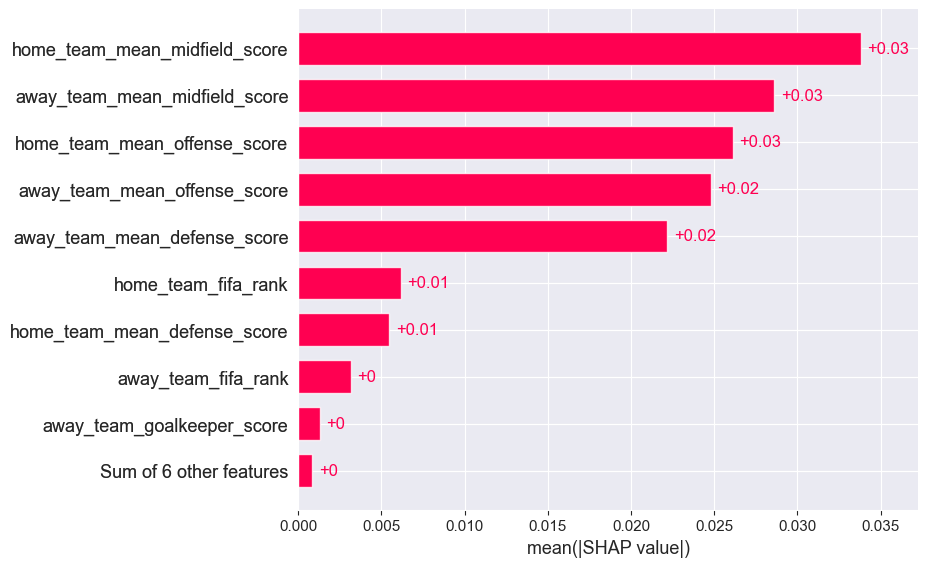

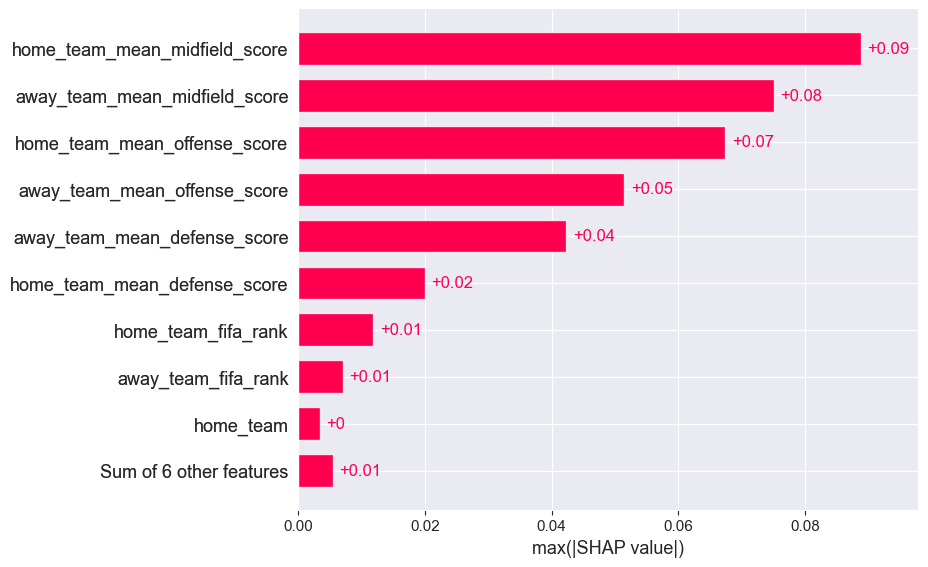

In [509]:
import shap

background_x = X_train[0:100]
# compute SHAP values
explainer = shap.Explainer(XGB, background_x)
shap_values = explainer(background_x)
shap_values.feature_names = matches.columns
shap_values = shap_values[:, :, 1]
shap.plots.bar(shap_values)
shap.plots.bar(shap_values.abs.max(0))

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


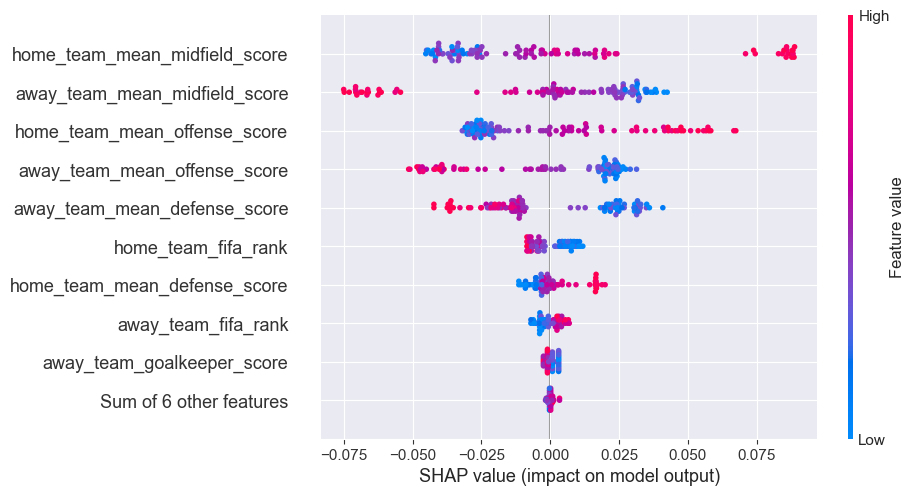

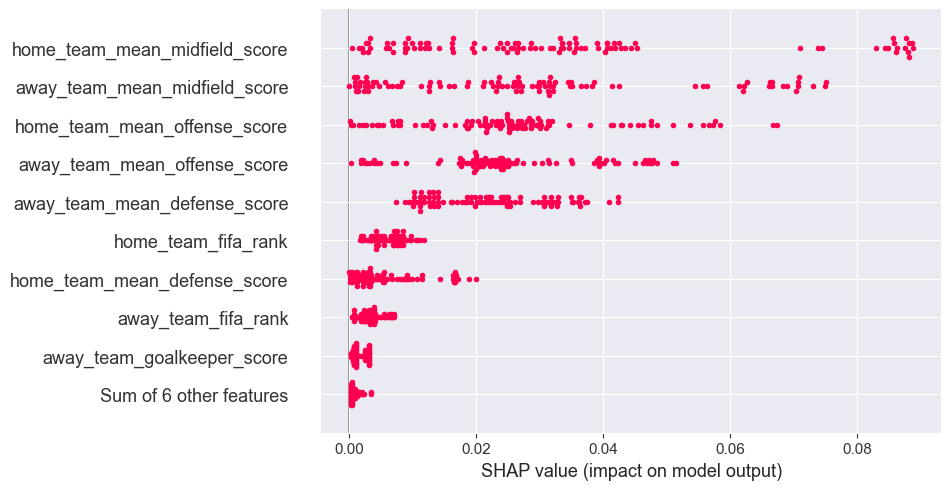

In [510]:
shap.plots.beeswarm(shap_values)
shap.plots.beeswarm(shap_values.abs, color="shap_red")

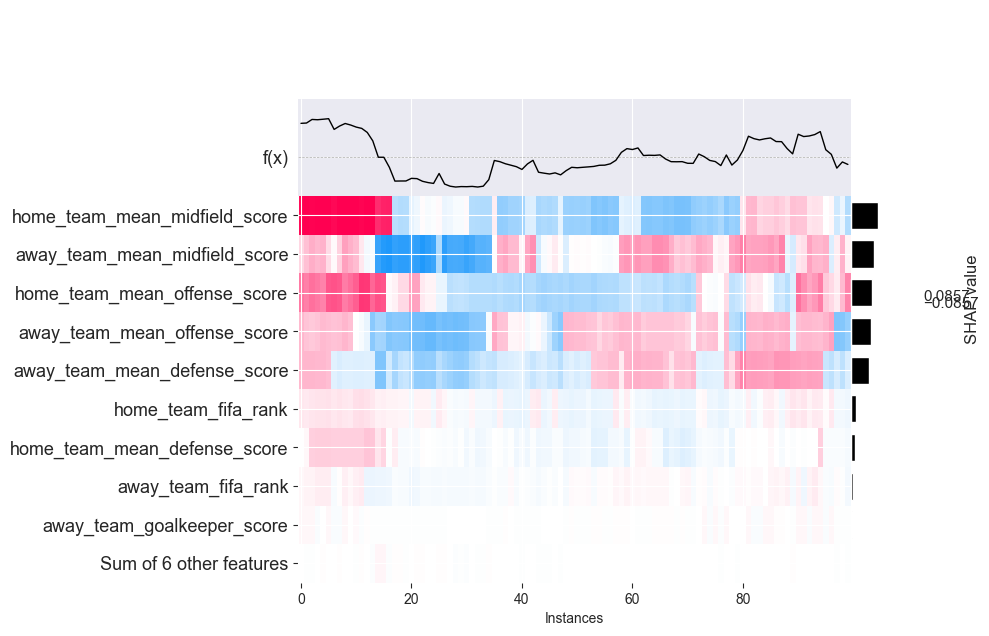

In [511]:
shap.plots.heatmap(shap_values[:1000])

### Hyperparameter optimization

In [528]:
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe

space={'max_depth': hp.quniform("max_depth", 3, 18, 1),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'colsample_bylevel' : hp.uniform('colsample_bylevel', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': 180,
    }

# Classifier:
def hyperparameter_tuning(space):
    model = xgb.XGBClassifier(n_estimators =space['n_estimators'], max_depth = int(space['max_depth']), gamma = space['gamma'],
                         reg_alpha = int(space['reg_alpha']), min_child_weight=space['min_child_weight'],
                         colsample_bytree=space['colsample_bytree'])

    model.fit(X_train, y_train,)

    test_acc = model.score(X_test, y_test)
    print ("SCORE:", test_acc)
    return {'loss': -test_acc, 'status': STATUS_OK, 'model': model}

In [529]:
trials = Trials()
best = fmin(fn=hyperparameter_tuning,
            space=space,
            algo=tpe.suggest,
            max_evals=100,
            trials=trials)

print (best)

SCORE:                                                 
0.5055762081784386                                     
SCORE:                                                                            
0.5027881040892194                                                                
SCORE:                                                                            
0.5088289962825279                                                                
SCORE:                                                                            
0.5037174721189591                                                                
SCORE:                                                                            
0.5060408921933085                                                                
SCORE:                                                                            
0.49814126394052044                                                               
SCORE:                                                    